In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np

%matplotlib inline

In [2]:
fashion_mnist=keras.datasets.fashion_mnist

In [3]:
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

In [4]:
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
range(100)

range(0, 100)

In [6]:
from matplotlib import pyplot

def first_100_images(image_data):
    plt.figure(figsize=(10,10))
    # create loop to iterate though
    for i in range(100):
        plt.subplot(10,10,i+1)
        #Remove the images from x-axis
        plt.xticks([])
        #Remove the images from y-axis
        plt.yticks([])
        #plot images
        plt.imshow(image_data[i])
    
    plt.show()
        

First_100 Images Displayed


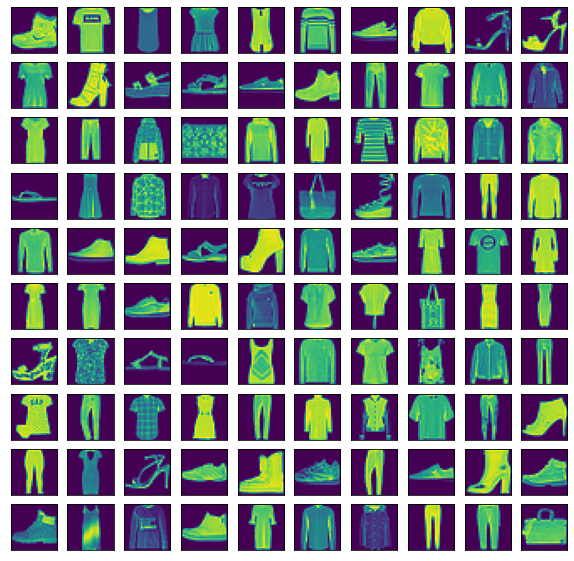

In [7]:
print("First_100 Images Displayed")
first_100_images(x_train_full)

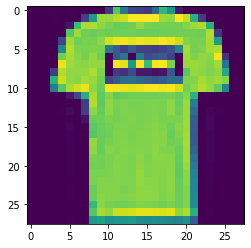

In [8]:
plt.imshow(x_train_full[1])

In [9]:
y_train_full.size

60000

In [10]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_train_full[1]

0

In [12]:
class_names=["T-shirt/top",'Trouser','Pullover',
             'Dress','Coat','Sandal','Shirt',
             'Sneaker','Bag','Ankle boot']

In [13]:
class_names[y_train_full[1]]

'T-shirt/top'

In [14]:
x_train_full[1]#pixels row wise, 0 represent black and 255 represent white

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

# Data Normalization

In [15]:
x_train_n=x_train_full/255.
x_test_n=x_test/255.

In [16]:
#we have 60k for training and 10k for testing
#we will split data further in training, validation and testing
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [17]:
x_valid[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04313725, 0.55686275, 0.78431373,
        0.41568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.7254902 ,
        0.43921569, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.59607843, 0.83921569, 0.85098039, 0.76078431,
        0.9254902 , 0.84705882, 0.73333333, 0.58431373, 0.52941176,
        0.6       , 0.82745098, 0.85098039, 0.90588235, 0.80392157,
        0.85098039, 0.7372549 , 0.13333333, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25882353, 0.7254902 , 0.65098039, 0.70588235, 0.70980392,
        0.74509804, 0.82745098, 0.86666667, 0.77254902, 0.57254902,
        0.77647059, 0.8078

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model=keras.models.Sequential()

In [20]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
import pydot

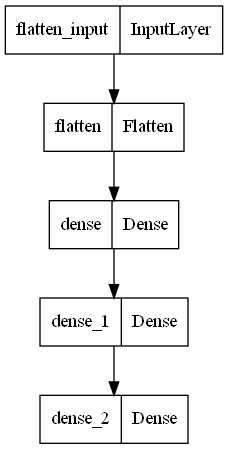

In [23]:
keras.utils.plot_model(model)

In [24]:
weights,bias=model.layers[1].get_weights()

In [25]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
bias.shape

(300,)

In [29]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
              metrics=['accuracy']
            )

In [30]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 4ms/step - loss: 0.7239 - accuracy: 0.7643 - val_loss: 0.5211 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4842 - accuracy: 0.8321 - val_loss: 0.4352 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4388 - accuracy: 0.8455 - val_loss: 0.5341 - val_accuracy: 0.7984
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4121 - accuracy: 0.8565 - val_loss: 0.3916 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3937 - accuracy: 0.8619 - val_loss: 0.3747 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3751 - accuracy: 0.8675 - val_loss: 0.3712 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3631 - accuracy: 0.8714 - val_loss: 0.3626 - val_accuracy

In [31]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
model.history.history

{'loss': [0.7238963842391968,
  0.4841609597206116,
  0.4388359487056732,
  0.41210880875587463,
  0.3936830163002014,
  0.3750554025173187,
  0.36307492852211,
  0.35167768597602844,
  0.34122443199157715,
  0.3319668471813202,
  0.3239501118659973,
  0.314779132604599,
  0.3079925775527954,
  0.3020594120025635,
  0.2946440577507019,
  0.2888789474964142,
  0.2839704155921936,
  0.2777304947376251,
  0.27290913462638855,
  0.26735952496528625,
  0.2625105679035187,
  0.2577986717224121,
  0.2536044120788574,
  0.2486632764339447,
  0.24438659846782684,
  0.240587055683136,
  0.2365162968635559,
  0.2327929139137268,
  0.22858819365501404,
  0.22532610595226288],
 'accuracy': [0.7642727494239807,
  0.8321454524993896,
  0.8454545736312866,
  0.8565090894699097,
  0.8619454503059387,
  0.8674908876419067,
  0.871399998664856,
  0.875072717666626,
  0.8791818022727966,
  0.8824545741081238,
  0.8841454386711121,
  0.8865636587142944,
  0.8894727230072021,
  0.8915272951126099,
  0.89372

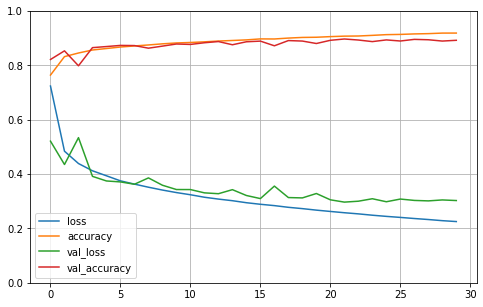

In [33]:
pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [34]:
model.evaluate(x_test,y_test) #accuracy score

313/313 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8821


[0.33530178666114807, 0.882099986076355]

In [35]:
x_new=x_test[:10]

In [36]:
y_proba=model.predict(x_new)#probabilities
y_proba.round(2)

1/1 [==============================] - 0s 238ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.1 , 0.  , 0.01, 0.  , 0.01, 0.  , 0.88, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.84, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_pred=np.argmax(model.predict(x_new), axis=-1)
y_pred

1/1 [==============================] - 0s 35ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


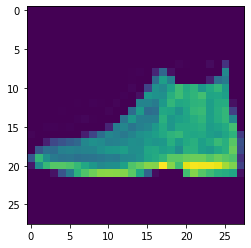

In [44]:
print(plt.imshow(x_test[0]))